<a href="https://colab.research.google.com/github/hafsaAit/MODELS/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mois fiscal               139 non-null    object
 1   Ventes Totales (MAD) TTC  139 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


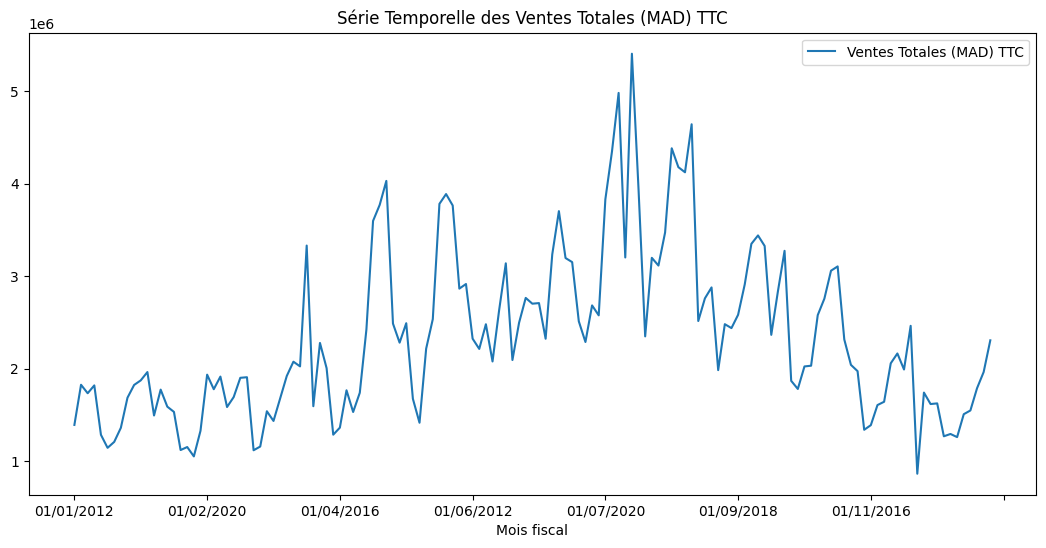

In [ ]:
 # @title UHT
df = pd.read_excel("RAIB ET LBEN.xlsx")
df.info()


df.plot(x='Mois fiscal', y='Ventes Totales (MAD) TTC', figsize=(13, 6))
plt.title('Série Temporelle des Ventes Totales (MAD) TTC')
plt.show()


In [ ]:

# @title diviser les données ( data train & data test)

df['Mois fiscal'] = pd.to_datetime(df['Mois fiscal'], format='%d/%m/%Y')

date_fin_train = pd.to_datetime('01/10/2022', format='%d/%m/%Y')

df_train = df[df['Mois fiscal'] < date_fin_train].copy()
df_test = df[df['Mois fiscal'] >= date_fin_train].copy()


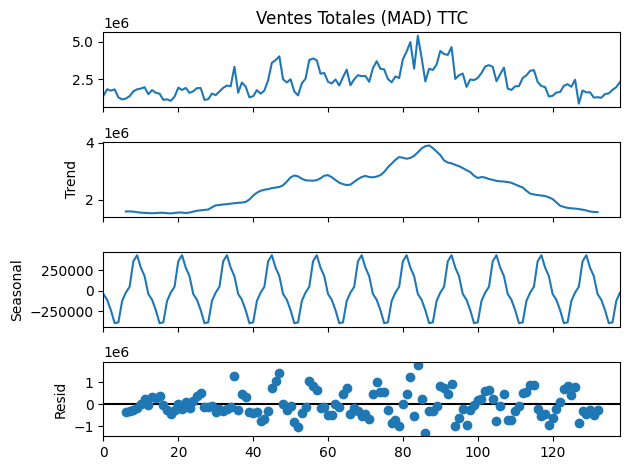

In [ ]:
# @title Décompositon de la série temporelle
## Extraire la série temporelle des ventes
ts = df['Ventes Totales (MAD) TTC']
# Décomposer la série temporelle
decomposition = seasonal_decompose(ts, model='additive', period=12)
# Afficher la décomposition
fig = decomposition.plot()
plt.show()


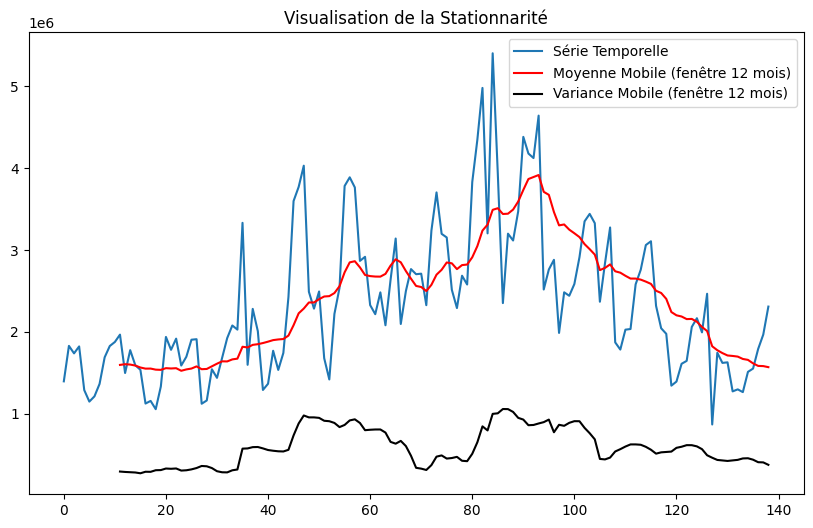

In [ ]:

ts = df['Ventes Totales (MAD) TTC']

# Vérifier s'il y a des valeurs manquantes dans la série temporelle
if ts.isnull().any():
    print("Il y a des valeurs manquantes dans la série temporelle.")
else:

    # Calculer la moyenne mobile et la variance mobile
    rolling_mean = ts.rolling(window=12).mean()
    rolling_std = ts.rolling(window=12).std()


    # Tracer la série temporelle, la moyenne mobile et la variance mobile
    plt.figure(figsize=(10, 6))
    plt.plot(ts, label='Série Temporelle')
    plt.plot(rolling_mean, color='red', label='Moyenne Mobile (fenêtre 12 mois)')
    plt.plot(rolling_std, color='black', label='Variance Mobile (fenêtre 12 mois)')
    plt.legend()
    plt.title('Visualisation de la Stationnarité')
    plt.show()

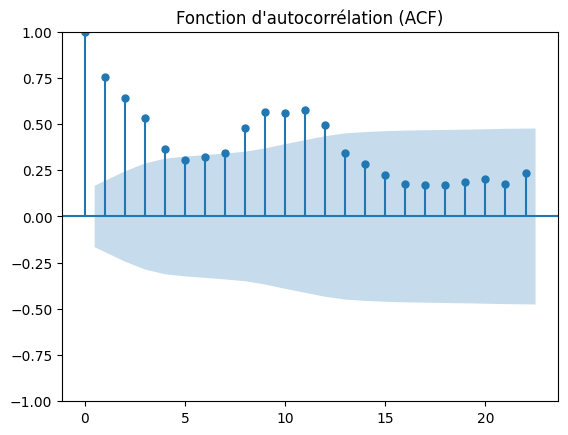

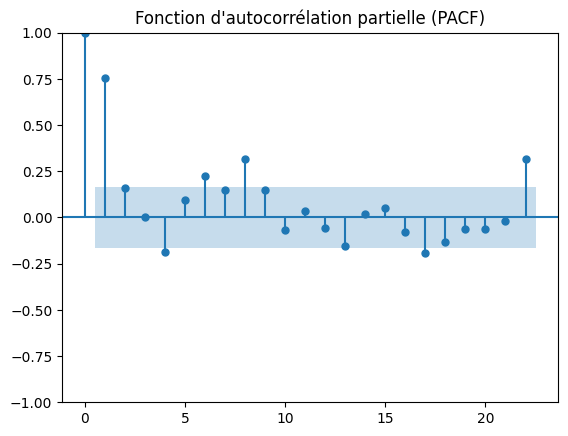

In [ ]:

# @title ACF & PACF
# Importer le module pour ACF et PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Extraire la série temporelle à partir de votre DataFrame df
ts = df['Ventes Totales (MAD) TTC']

# Tracez la fonction d'autocorrélation (ACF)
plot_acf(ts)
plt.title('Fonction d\'autocorrélation (ACF)')
plt.show()

# Tracez la fonction d'autocorrélation partielle (PACF)
plot_pacf(ts)
plt.title('Fonction d\'autocorrélation partielle (PACF)')
plt.show()



In [ ]:
# MODEL AR


model_ar = ARIMA(ts, order=(12, 0, 0))
model_ar_fit = model_ar.fit()


print(model_ar_fit.summary())


                                  SARIMAX Results                                   
Dep. Variable:     Ventes Totales (MAD) TTC   No. Observations:                  139
Model:                      ARIMA(12, 0, 0)   Log Likelihood               -2022.367
Date:                      Fri, 29 Mar 2024   AIC                           4072.734
Time:                              10:51:48   BIC                           4113.816
Sample:                                   0   HQIC                          4089.429
                                      - 139                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.343e+06   5.17e-09   4.53e+14      0.000    2.34e+06    2.34e+06
ar.L1          0.4925      0.077      6.410      0.000       0.342       0.643
ar.L

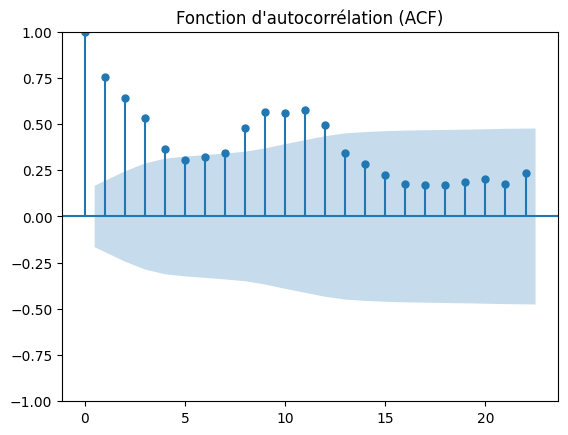

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Tracer la fonction d'autocorrélation (ACF)
plot_acf(ts)
plt.title('Fonction d\'autocorrélation (ACF)')
plt.show()


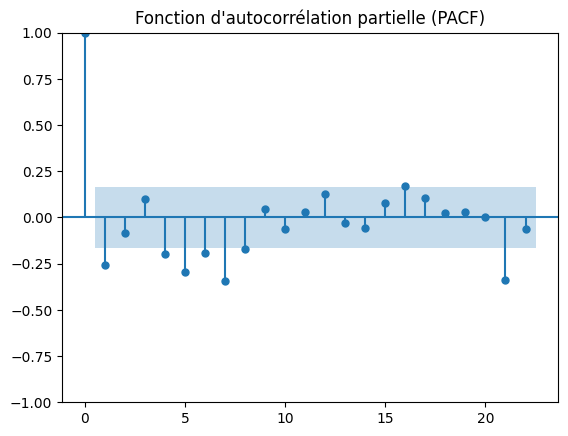

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf


plot_pacf(ts.diff().dropna())
plt.title('Fonction d\'autocorrélation partielle (PACF)')
plt.show()


In [19]:
from statsmodels.tsa.arima.model import ARIMA


model_ma = ARIMA(ts, order=(0, 0, 7))
model_ma_fit = model_ma.fit()

# Résumé du modèle MA
print(model_ma_fit.summary())


                                  SARIMAX Results                                   
Dep. Variable:     Ventes Totales (MAD) TTC   No. Observations:                  139
Model:                       ARIMA(0, 0, 7)   Log Likelihood               -2050.029
Date:                      Fri, 29 Mar 2024   AIC                           4118.058
Time:                              12:10:52   BIC                           4144.469
Sample:                                   0   HQIC                          4128.791
                                      - 139                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.343e+06   4.69e+05      5.000      0.000    1.42e+06    3.26e+06
ma.L1          0.5956      0.147      4.047      0.000       0.307       0.884
ma.L

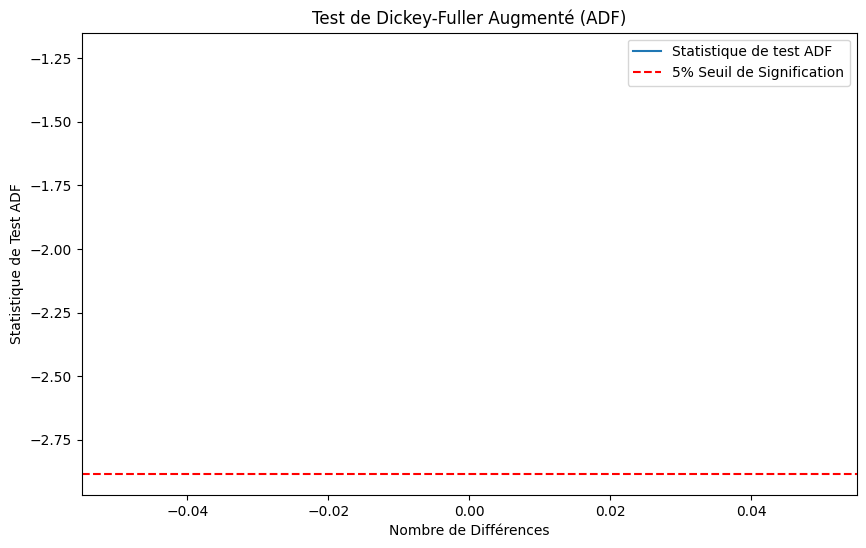

In [17]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

result = adfuller(ts)

adf_stat = result[0]

plt.figure(figsize=(10, 6))
plt.plot(result[0], label='Statistique de test ADF')
plt.axhline(y=result[4]['5%'], color='r', linestyle='--', label='5% Seuil de Signification')
plt.title('Test de Dickey-Fuller Augmenté (ADF)')
plt.xlabel('Nombre de Différences')
plt.ylabel('Statistique de Test ADF')
plt.legend()
plt.show()


In [16]:
from statsmodels.tsa.stattools import adfuller

# Effectuer le test de Dickey-Fuller augmenté (ADF)
result = adfuller(ts)

# Extraire la statistique de test et la p-valeur
adf_stat = result[0]
p_value = result[1]

# Imprimer la statistique de test et la p-valeur
print(f'Statistique de test ADF : {adf_stat}')
print(f'p-valeur : {p_value}')

# Interpréter les résultats
if p_value <= 0.05:
    print("La série temporelle est stationnaire ")
else:
    print("La série temporelle n'est pas stationnaire ")


Statistique de test ADF : -1.2318464488118468
p-valeur : 0.6597483799496979
La série temporelle n'est pas stationnaire (ne pas rejeter l'hypothèse nulle)


In [18]:
from statsmodels.tsa.stattools import adfuller


def optimal_determination(ts):
    d = 0
    stationary = False

    # Répéter le test de stationnarité jusqu'à ce que la série temporelle devienne stationnaire
    while not stationary:

        result = adfuller(ts)


        p_value = result[1]

        # Vérifier si la série temporelle est stationnaire (p-valeur <= 0.05)
        if p_value <= 0.05:
            stationary = True
        else:
            # Si la série temporelle n'est pas stationnaire, différencier une fois de plus
            ts = ts.diff().dropna()
            d += 1

    return d


optimal_d = optimal_determination(ts)
print("Nombre optimal de différenciations (d) :", optimal_d)


Nombre optimal de différenciations (d) : 1


In [20]:
# @title MODEL ARIMA
from statsmodels.tsa.arima.model import ARIMA


model_arima = ARIMA(ts, order=(12, 1, 7))

model_arima_fit = model_arima.fit()

print(model_arima_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                  SARIMAX Results                                   
Dep. Variable:     Ventes Totales (MAD) TTC   No. Observations:                  139
Model:                      ARIMA(12, 1, 7)   Log Likelihood               -2004.796
Date:                      Fri, 29 Mar 2024   AIC                           4049.593
Time:                              12:18:53   BIC                           4108.138
Sample:                                   0   HQIC                          4073.384
                                      - 139                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4198      0.842      0.498      0.618      -1.231       2.070
ar.L2         -0.3736      0.520     -0.719      0.472      -1.393       0.646
ar.L

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
